Parte 1

A)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_table('Part 1.tsv', comment='#')

pt1 = df.sample(frac=0.2)

X1 = pt1.iloc[:, :6].values
y1 = pt1["target"].values




B)

In [2]:

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

C)

In [3]:
from sklearn.model_selection import train_test_split
from rich.progress import track

# implement the activation and cost functions
def sigmoid(Z):
    return 1.0 / (1.0 + np.exp(-Z))

def sigmoid_derivative(output):
    return output * (1.0 - output)

def cost_function(y1, y1_hat):
  
    # sum of squares error function
    return np.sum(np.square(y1 - y1_hat))*0.5

def cost_gradient(y1, y1_hat):

  # derivative of the cost function
    return -(y1 - y1_hat)

In [4]:
# From lab 09

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

def print_dim(name, var):
    print(f"{name} = {var.shape}")

class FiveLayerPerceptronRegressor(BaseEstimator, RegressorMixin):
    """
    A fully connected 5-layer perceptron for binary regression.
    
    Parameters
    ----------
    size_hidden : int
        The size of the hidden layer
    epochs : int
        The number of epochs to train the model
    leargning_rate : float
        The learning rate for the gradient descent
    batch_size : int, default 50
        The number of datapoints in each mini-batch
    random_state : random_state, default None
        a numpy random state for reproducibility. If None (default)
        The default numpy random generator with seed 0 will be used

    
    Notes
    -----
    This implementation initializes the weights using a random Gaussian
    distribution with mean 0 and standard deviation 0.001
    """
    def __init__(self, 
                 size_hidden, 
                 epochs, 
                 learning_rate, 
                 batch_size, 
                 random_state=None):
        self.size_hidden = size_hidden
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        if random_state is None:
            self.rng = np.random.default_rng(0)
        else:
            self.rng = random_state
        # the dimensionality of _W0 will be set in the fit function
        self._W1 = self.rng.normal(scale=0.001, size=(self.size_hidden + 1, self.size_hidden))

        #weight
        self._W2 = self.rng.normal(scale=0.001, size=(self.size_hidden + 1, self.size_hidden))

        #weight
        self._W3 = self.rng.normal(scale=0.001, size=(self.size_hidden + 1, self.size_hidden))

        #weight
        self._W4 = self.rng.normal(scale=0.001, size=(self.size_hidden + 1, self.size_hidden))

        #weight
        self._W5 = self.rng.normal(scale=0.001, size=(self.size_hidden + 1, 1))
        self.training_losses = np.zeros(self.epochs)
        
    def _forward(self, X1):
        # 1st layer
        self.O1 = X1 @ self._W0
        self.A1 = sigmoid(self.O1)

        # add bias
        n, _ = self.A1.shape
        self.A1 = np.c_[np.ones((n, 1)), self.A1]

        # 2nd layer 
        self.Z2 = self.A1 @ self._W1
        self.A2 = sigmoid(self.Z2)

        # add bias
        n, _ = self.A2.shape
        self.A2 = np.c_[np.ones((n, 1)), self.A2]

        # 3rd layer 
        self.Z3 = self.A2 @ self._W2
        self.A3 = sigmoid(self.Z3)

        # add bias
        n, _ = self.A3.shape
        self.A3 = np.c_[np.ones((n, 1)), self.A3]

        # 4th layer 
        self.Z4 = self.A3 @ self._W3
        self.A4 = sigmoid(self.Z4)

        # add bias
        n, _ = self.A4.shape
        self.A4 = np.c_[np.ones((n, 1)), self.A4]

        # 5th layer
        self.O5 = self.A4 @ self._W4
        self.A5 = sigmoid(self.O5)

        # add bias
        n, _ = self.A5.shape
        self.A5 = np.c_[np.ones((n, 1)), self.A5]

        # 6th layer or output layer
        self.O6 = self.A5 @ self._W5
        self.A6 = self.O6

        # return the identity of the output layer instead of the sigmoid
        return self.A6
        
    def _backward(self, X1, y1):

        # starting by the last one
        dA6 = cost_gradient(y1, self.A6)
        dO6 = dA6 * sigmoid_derivative(sigmoid(self.O6))
        dW5 = self.A5.T @ dO6

        # 5th layer backpropagation
        dA5 = dO6 @ self._W5[1:,:].T
        dO5 = dA5 * sigmoid_derivative(sigmoid(self.O5))
        dW4 = self.A4.T @ dO5

        # 4th layer backpropagation
        dA4 = dO5 @ self._W4[1:,:].T
        dO4 = dA4 * sigmoid_derivative(sigmoid(self.Z4))
        dW3 = self.A3.T @ dO4

        # 3rd layer backpropagation
        dA3 = dO4 @ self._W3[1:,:].T
        dO3 = dA3 * sigmoid_derivative(sigmoid(self.Z3))
        dW2 = self.A2.T @ dO3

        # 2nd layer backpropagation
        dA2 = dO3 @ self._W2[1:,:].T
        dO2 = dA2 * sigmoid_derivative(sigmoid(self.Z2))
        dW1 = self.A1.T @ dO2

        # 1st layer backpropagation
        dA1 = dO2 @ self._W1[1:,:].T
        dO1 = dA1 * sigmoid_derivative(sigmoid(self.O1))
        dW0 = X1.T @ dO1

        return dW0, dW1, dW2, dW3, dW4, dW5

        
    def _weight_update(self, dW0, dW1, dW2, dW3, dW4, dW5, curr_batch_size):
        self._W0 -= self.learning_rate * dW0
        self._W1 -= self.learning_rate * dW1
        self._W2 -= self.learning_rate * dW2
        self._W3 -= self.learning_rate * dW3
        self._W4 -= self.learning_rate * dW4
        self._W5 -= self.learning_rate * dW5


    def fit(self, X1, y1):
        X1, y1 = check_X_y(X1, y1)
        n, m = X1.shape
        _X1 = np.c_[np.ones((n, 1)), X1]
        _y1 = y1[:,np.newaxis]
        self._W0 = self.rng.normal(scale=0.001, size=(m+1, self.size_hidden))
        
        #number of batches
        n_batches = (n + self.batch_size - 1) // self.batch_size
        
        for epoch in track(range(self.epochs), description="Training..."):
            for b in range(n_batches):
                _X1_batch = _X1[b * self.batch_size : (b + 1) * self.batch_size]
                _y1_batch = _y1[b * self.batch_size : (b + 1) * self.batch_size]
                y_pred = self._forward(_X1_batch)
                dW0, dW1, dW2, dW3, dW4, dW5  = self._backward(_X1_batch, _y1_batch)
                curr_batch_size = _y1_batch.shape[0]
                self._weight_update(dW0, dW1, dW2, dW3, dW4, dW5, curr_batch_size)
            y1_pred = self._forward(_X1)
            self.training_losses[epoch] = cost_function(_y1, y1_pred)
        
        self.fitted_ = True
    
    def predict(self, X1):
        return self.predict_proba(X1).argmax(axis=1)
    
    def predict_proba(self, X1):
        check_is_fitted(self)
        
        X1 = check_array(X1)
        n, m = X1.shape
        _X1 = np.c_[np.ones((n, 1)), X1]
        
        pred_1 = self._forward(_X1)
        pred_0 = 1 - pred_1
        return np.c_[pred_0, pred_1]


In [5]:
# Implementation from lab 09

model = FiveLayerPerceptronRegressor(3, 1000, 0.001, 5)
model.fit(X1_train, y1_train)

Training... ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━  70% 0:00:38

D)

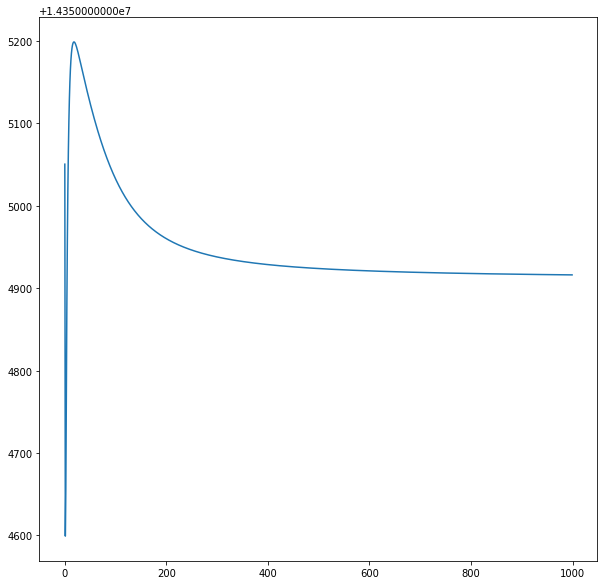

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(model.training_losses)
plt.show()
plt.close("all")

E)

In [7]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(X1_train, y1_train)
regr.predict(X1_test)
regr.score(X1_test, y1_test)


C:\Users\jvict\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9972808252056388

F)

In [8]:
# mlpregressor model
from sklearn.metrics import mean_squared_error

print("MLPregressor")
test_mse = mean_squared_error(y1_test, regr.predict(X1_test))
train_mse = mean_squared_error(y1_train, regr.predict(X1_train))
print(f'Train MSE : {train_mse}')
print(f'Test MSE : {test_mse}')

# our model 
test_mse = mean_squared_error(y1_test, model.predict(X1_test))
train_mse = mean_squared_error(y1_train, model.predict(X1_train))
print("\nOur model:")
print(f'Train MSE : {train_mse}')
print(f'Test MSE : {test_mse}')

MLPregressor
Train MSE : 54.97323981433775
Test MSE : 56.233644868514

Our model:
Train MSE : 20507.248407268227
Test MSE : 20688.127718007814


Parte 2

In [9]:
pt2 = pd.read_table('Part 2.tsv', comment='#')

X2 = pt2.iloc[:, :4].values
y2 = pt2["target"].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [10]:

# 3 implement the activation and cost functions
def sigmoid(Z):
    return 1.0 / (1.0 + np.exp(-Z))

def sigmoid_derivative(output):
    return output * (1.0 - output)

def cost_function(y2, y2_hat):
    return -np.sum(y2*(np.log(y2_hat)) + (1 - y2)*np.log(1 - y2_hat)) / y2.shape[0]

def cost_gradient(y2, y2_hat):
    return -np.divide(y2, y2_hat) + np.divide(1.0 - y2, 1.0 - y2_hat)

In [11]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

def print_dim(name, var):
    print(f"{name} = {var.shape}")

class MultiLayerPerceptronClassifier(BaseEstimator, ClassifierMixin):
    """
    A fully connected 5-layer perceptron for binary regression.
    
    Parameters
    ----------
    size_hidden : int
        The size of the hidden layer
    epochs : int
        The number of epochs to train the model
    leargning_rate : float
        The learning rate for the gradient descent
    batch_size : int, default 50
        The number of datapoints in each mini-batch
    random_state : random_state, default None
        a numpy random state for reproducibility. If None (default)
        The default numpy random generator with seed 0 will be used

    
    Notes
    -----
    This implementation initializes the weights using a random Gaussian
    distribution with mean 0 and standard deviation 0.001
    """
    def __init__(self, 
                 size_hidden, 
                 epochs, 
                 learning_rate, 
                 batch_size, 
                 random_state=None):
        self.size_hidden = size_hidden
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        if random_state is None:
            self.rng = np.random.default_rng(0)
        else:
            self.rng = random_state
        # the dimensionality of _W0 will be set in the fit function
        self._W1 = self.rng.normal(scale=0.001, size=(self.size_hidden + 1, self.size_hidden))

        #weight
        self._W2 = self.rng.normal(scale=0.001, size=(self.size_hidden + 1, self.size_hidden))

        #weight
        self._W3 = self.rng.normal(scale=0.001, size=(self.size_hidden + 1, self.size_hidden))

        #weight
        self._W4 = self.rng.normal(scale=0.001, size=(self.size_hidden + 1, self.size_hidden))

        #weight
        self._W5 = self.rng.normal(scale=0.001, size=(self.size_hidden + 1, 1))
        self.training_losses = np.zeros(self.epochs)
        
    def _forward(self, X1):
        # 1st layer
        self.O1 = X1 @ self._W0
        self.A1 = sigmoid(self.O1)

        # add bias
        n, _ = self.A1.shape
        self.A1 = np.c_[np.ones((n, 1)), self.A1]

        # 2nd layer 
        self.Z2 = self.A1 @ self._W1
        self.A2 = sigmoid(self.Z2)

        # add bias
        n, _ = self.A2.shape
        self.A2 = np.c_[np.ones((n, 1)), self.A2]

        # 3rd layer 
        self.Z3 = self.A2 @ self._W2
        self.A3 = sigmoid(self.Z3)

        # add bias
        n, _ = self.A3.shape
        self.A3 = np.c_[np.ones((n, 1)), self.A3]

        # 4th layer 
        self.Z4 = self.A3 @ self._W3
        self.A4 = sigmoid(self.Z4)

        # add bias
        n, _ = self.A4.shape
        self.A4 = np.c_[np.ones((n, 1)), self.A4]

        # 5th layer
        self.O5 = self.A4 @ self._W4
        self.A5 = sigmoid(self.O5)

        # add bias
        n, _ = self.A5.shape
        self.A5 = np.c_[np.ones((n, 1)), self.A5]

        # 6th layer or output layer
        self.O6 = self.A5 @ self._W5
        self.A6 = sigmoid(self.O6)

        # return the identity of the output layer instead of the sigmoid
        return self.A6
        
    def _backward(self, X1, y1):

        # starting by the last one
        dA6 = cost_gradient(y1, self.A6)
        dO6 = dA6 * sigmoid_derivative(sigmoid(self.O6))
        dW5 = self.A5.T @ dO6

        # 5th layer backpropagation
        dA5 = dO6 @ self._W5[1:,:].T
        dO5 = dA5 * sigmoid_derivative(sigmoid(self.O5))
        dW4 = self.A4.T @ dO5

        # 4th layer backpropagation
        dA4 = dO5 @ self._W4[1:,:].T
        dO4 = dA4 * sigmoid_derivative(sigmoid(self.Z4))
        dW3 = self.A3.T @ dO4

        # 3rd layer backpropagation
        dA3 = dO4 @ self._W3[1:,:].T
        dO3 = dA3 * sigmoid_derivative(sigmoid(self.Z3))
        dW2 = self.A2.T @ dO3

        # 2nd layer backpropagation
        dA2 = dO3 @ self._W2[1:,:].T
        dO2 = dA2 * sigmoid_derivative(sigmoid(self.Z2))
        dW1 = self.A1.T @ dO2

        # 1st layer backpropagation
        dA1 = dO2 @ self._W1[1:,:].T
        dO1 = dA1 * sigmoid_derivative(sigmoid(self.O1))
        dW0 = X1.T @ dO1

        return dW0, dW1, dW2, dW3, dW4, dW5

        
    def _weight_update(self, dW0, dW1, dW2, dW3, dW4, dW5, curr_batch_size):
        self._W0 -= self.learning_rate * dW0
        self._W1 -= self.learning_rate * dW1
        self._W2 -= self.learning_rate * dW2
        self._W3 -= self.learning_rate * dW3
        self._W4 -= self.learning_rate * dW4
        self._W5 -= self.learning_rate * dW5


    def fit(self, X1, y1):
        X1, y1 = check_X_y(X1, y1)
        n, m = X1.shape
        _X1 = np.c_[np.ones((n, 1)), X1]
        _y1 = y1[:,np.newaxis]
        self._W0 = self.rng.normal(scale=0.001, size=(m+1, self.size_hidden))
        
        #number of batches
        n_batches = (n + self.batch_size - 1) // self.batch_size
        
        for epoch in track(range(self.epochs), description="Training..."):
            for b in range(n_batches):
                _X1_batch = _X1[b * self.batch_size : (b + 1) * self.batch_size]
                _y1_batch = _y1[b * self.batch_size : (b + 1) * self.batch_size]
                y_pred = self._forward(_X1_batch)
                dW0, dW1, dW2, dW3, dW4, dW5  = self._backward(_X1_batch, _y1_batch)
                curr_batch_size = _y1_batch.shape[0]
                self._weight_update(dW0, dW1, dW2, dW3, dW4, dW5, curr_batch_size)
            y1_pred = self._forward(_X1)
            self.training_losses[epoch] = cost_function(_y1, y1_pred)
        
        self.fitted_ = True
    
    def predict(self, X1):
        return self.predict_proba(X1).argmax(axis=1)
    
    def predict_proba(self, X1):
        check_is_fitted(self)
        
        X1 = check_array(X1)
        n, m = X1.shape
        _X1 = np.c_[np.ones((n, 1)), X1]
        
        pred_1 = self._forward(_X1)
        pred_0 = 1 - pred_1
        return np.c_[pred_0, pred_1]

Parte 3

a)

In [12]:
pt3 = pd.read_csv('Adult.data', comment='#', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'target'])

pt3 ['target'] = pd.to_numeric(pt3['target'], errors='coerce')
pt3 = pt3.replace(np.nan, 0, regex=True)

X3 = pt3.iloc[:, :14].values
y3 = pt3['target'].values





b)

In [13]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

c)

In [17]:
import numpy as np
from collections import Counter


def entropy(y3):
    hist = np.bincount(y3)
    ps = hist / len(y3)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:

    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:

    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X3, y3):
        self.n_feats = X3.shape[1] if not self.n_feats else min(self.n_feats, X3.shape[1])
        self.root = self._grow_tree(X3, y3)

    def predict(self, X3):
        return np.array([self._traverse_tree(x3, self.root) for x3 in X3])

    def _grow_tree(self, X3, y3, depth=0):
        n_samples, n_features = X3.shape
        n_labels = len(np.unique(y3))

        # stopping criteria
        if (depth >= self.max_depth
                or n_labels == 1
                or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y3)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X3, y3, feat_idxs)
        
        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X3[:, best_feat], best_thresh)
        left = self._grow_tree(X3[left_idxs, :], y3[left_idxs], depth+1)
        right = self._grow_tree(X3[right_idxs, :], y3[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X3, y3, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X3_column = X3[:, feat_idx]
            thresholds = np.unique(X3_column)
            for threshold in thresholds:
                gain = self._information_gain(y3, X3_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y3, X3_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y3)

        # generate split
        left_idxs, right_idxs = self._split(X3_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y3)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y3[left_idxs]), entropy(y3[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X3_column, split_thresh):
        left_idxs = np.argwhere(X3_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X3_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x3, node):
        if node.is_leaf_node():
            return node.value

        if x3[node.feature] <= node.threshold:
            return self._traverse_tree(x3, node.left)
        return self._traverse_tree(x3, node.right)

    def _most_common_label(self, y3):
        counter = Counter(y3)
        most_common = counter.most_common(1)[0][0]
        return most_common

In [15]:
import numpy as np
from collections import Counter

def bootstrap_sample(X3, y3):
    n_samples = X3.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X3[idxs], y3[idxs]

def most_common_label(y3):
    counter = Counter(y3)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    
    def __init__(self, num_trees=10, min_samples_split=2,
                 max_depth=100, n_feats=None, n_estimators=100, random_state=0):
        self.num_trees = num_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X3, y3):
        self.trees = []
        for _ in range(self.num_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split,
                max_depth=self.max_depth, n_feats=self.n_feats)
            X3_samp, y3_samp = bootstrap_sample(X3, y3)
            tree.fit(X3_samp, y3_samp)
            self.trees.append(tree)

    def predict(self, X3):
        tree_preds = np.array([tree.predict(X3) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y3_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y3_pred)

In [16]:
from sklearn.datasets import make_classification

X3, y3 = make_classification(n_samples=400, n_features=15)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3)

num_features = X3_train.shape[1] // 3

rf = RandomForest(min_samples_split=20, max_depth=6, num_trees=10, n_feats=num_features,  n_estimators=100, random_state=0)
rf.fit(X3_train, y3_train)
test_mse = mean_squared_error(y3_test, rf.predict(X3_test))
train_mse = mean_squared_error(y3_train, rf.predict(X3_train))

print(f'Train MSE : {train_mse}')
print(f'Test MSE : {test_mse}')

NameError: name 'X' is not defined

Parte 4

In [ ]:
from sklearn.datasets import make_classification

X2, y2 = make_classification(n_samples=400, n_features=15)
X2_train, X2_test, y2_train, y2_test = train_test_split(X3, y3)

num_features = X2_train.shape[1] // 3

rf = RandomForest(min_samples_split=20, max_depth=6, num_trees=10, n_feats=num_features,  n_estimators=100, random_state=0)
rf.fit(X2_train, y2_train)
test_mse = mean_squared_error(y2_test, rf.predict(X2_test))
train_mse = mean_squared_error(y2_train, rf.predict(X2_train))

print(f'Train MSE : {train_mse}')
print(f'Test MSE : {test_mse}')

Train MSE : 0.49333333333333335
Test MSE : 0.51


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_random = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=0)

model_random.fit(X2_train, y2_train)

pred = model_random.predict(X2_test)

pred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [ ]:
model_random1 = RandomForest(min_samples_split=20, max_depth=6, num_trees=10, n_feats=num_features,  n_estimators=100, random_state=1)


model_random1.fit(X2_train, y2_train)

pred = model_random1.predict(X2_test)

pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])